# New Hire Python Training - Day 2 Assignment 2 - Financial Analysis
This Jupyter Notebook file is **Day 2 Assignment 2** of the J.P. Morgan New Hire PYthon Training. 

Beneath each blue <font color = 'blue'> **EXERCISE**</font>, there is a code cell that looks like this:

### Exercise 1 - Linear Regression - Fama French Factor Model
In this exercise you will practice performing linear regression using the Fama and French Three Factor Model, an asset pricing model that expands on the Capital Asset Pricing Model (CAPM) by adding size risk and value risk factors to the market risk factor in the CAPM. This model considers that value and small-cap stocks outperform markets on a regular basis.

The general equation for the Fama-French model is: Rp-Rf  =α + β1 * MRP + β2 * SMB + β3 *HML

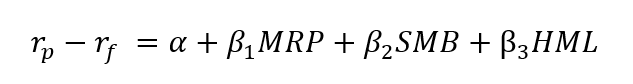

Where: rp – rf is the expected excess return of the portfolio or stock over the risk free rate; MRP is the market risk premium, SMB is the size premium, HML is the value premium, and β1,2,3 refer to the factor coefficients.

1. Load the Apple stock data (AAPL.csv) and the Fama-French 3 Factor Daily data (ff3_daily.csv found in the ExData folder).
2. Convert both dates to datetime.
    - For Apple data specify the format as ‘%Y-%m-%d’.
    - For Fama-French data specify the format as ‘%Y%m%d’.
3. Calculate the daily simple returns for Apple using the adjusted close prices. Remember to scale the returns by 100 to match the Fama-French data.	
4. Merge the Apple returns and Fama-French data into a data frame named ‘data’.
5. Drop all NAs.
6. Calculate the excess returns for Apple (return minus risk-free rate) in a new column.
7. Perform a linear regression using OLS with and without a constant (alpha). Interpret your results.

<font color = 'blue'> **EXERCISE 1 SOLUTION** </font>

In [2]:
#%% Exercise 1

### Exercise 2 - Linear Regression - Time Series SPX Volatility
In this exercise you will practice performing time series regression using OLS.

1. Load the SP500 volatility data (SP500_vol.csv located in ExData folder).
2. Extract the ‘rtnClose’, ‘vol’, ‘vol_1’, ‘vol_ma_5’, ‘vol_ma_21’ columns into a data frame named ts500.
3. Scale the returns and volatility by 100 and 10000 respectively and drop any na rows.
4. Add a constant to the data frame.
5. Perform a linear regression using OLS for the following equation: Vol_t=α+β_1 Vol_(t-1)+β_2 Vol_MA5+β_3 Vol_MA21

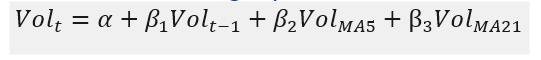

6. Interpret your results.
7. Graph the actual (y) and the estimated (y ̂) on the same chart.


<font color = 'blue'> **EXERCISE 2 SOLUTION** </font>

In [1]:
#%% Exercise 2

## Advanced Question

### Exercise 3 - Portfolio Optimization
In this exercise you will practice performing portfolio optimization with the scipy package. Feel free to reuse the codes from the Session 2 demo codes of Week 2 ADAPT program.

Find the optimal portfolio weights in the following securities using the daily adjusted closing prices from the StockData folder. Find the weights for the minimum variance portfolio on the efficient frontier and also for a portfolio with an expected annual return of 15%. Assume no short-selling is allow (weights >= 0 and <=1).

tickers = ['NKE', 'KO', 'MCD', 'WMT', 'AAPL']

Use the steps below to help you with the solution.

*Challenge: Re-run the analysis for multiple expected returns (12%, 14%, 16%... 28%) and plot the efficient frontier.*

<font color = 'blue'> **EXERCISE 3 SOLUTION** </font>

1. Import pandas and the minimize function from scipy.optimize package.

In [45]:
#%% Exercise 6
import pandas as pd
from scipy.optimize import minimize
import numpy as np

2. Load the csv files of Nike (NKE), Coca-Cola (KO), McDonald's (MCD), Walmart (WMT) and Apple (AAPL). Calculate the daily returns using the Adjusted Close and combine all the returns columns of each security into a single table.
- create an empty list to store all the returns of each ticker
- loop through a list of the tickers to help automate reading the files
- while reading the files, parse the dates and set the index column to Date
- calculate the daily returns using the Adj Close; multiply the returns by 100 to show them in %
- append just the returns column to the empty list
- concat the list of all the returns columns using pd.concat() with axis=1: stockData = pd.concat(listVariable, axis = 1)
    - the axis = 1 ensures the columns are side by side and not stacked on top of each other
- rename the columns of the combined dataframe to the tickers imported (e.g. AAPL column should have the AAPL returns, etc.)

In [7]:
# Tickers to load
tickers = ['NKE', 'KO', 'MCD', 'WMT', 'AAPL']

# Load all tickers and keep daily returns


In [8]:
# Combine all ticker returns into one dataframe


3. Extract all the key stats of the data set into the following variables:
- mu - will keep track of all the average daily returns of each ticker
- V - will keep track of the covariance matrix of all the tickers (use stockData.cov())
- std - will keep track of the standard deviations of the daily returns of each ticker
- n - number of securities being analyzed

In [9]:
# Covariance, Average Returns and Standard Deviations


4. Create a summary dataframe that shows the following columns:
- The index with the list of tickers
- The STD of daily returns
- The daily average returns
- A new calculated field showing the annual returns (use 252 trading days as the assumption)
- A new calculated field showing the std of annual returns (multiple the daily STD by the square root of 252)

In [10]:
# Create Summary Table


5. Set up the parameters for the optimization model:
- w: variable to keep track of initial guesses for the weights (create a matrix or list of equal weights for each security) 
- minimization function: use the simplified variance function using matrices (dot product of weights transposed, covariance matrix, and weights)
    - ensure the first argument of the function are the weights
    - modify the function to calculate the annual variance by multiplying the result by 252
- portfolio return function: create a function that calculates the annual portfolio return by using the weights and the average daily returns of each security
- Constraint 1: sum of all weights should be 1
- Constraint 2: calculated portfolio annual return should meet or exceed a target/hurdle annual return
- Bounds: limit the portfolio weights of each security to be between 0 and 1 (no short selling) 
    - use a tuple of (min, max) pairs for each security
- expect_return: variable to keep track of required annual return of 15%

In [ ]:
#Set up Optimization Model


#Minimization function


#Portfolio return function 


#Bounds no short selling


#Constraints



6. Run two different optimization models:
- one with only Constraint 1, to find the minimum variance portfolio
- one with both constraints and expected annual return of 15%

For each portfolio analyze the results and print out the calculated portfolio annual return, weights in each security and portfolio standard deviation of annual returns (square root of the variance from optimization model).

In [11]:
#Model with no expected return - minimum variance portfolio


In [12]:
#Model with expected return


Challenge steps:
- create a list of target annual returns (between 12% and 28%)
- create empty lists to track the portfolio annual returns, standard deviations, and security weights for each iteration of the model
- loop through all the target annual returns and run the model with the updated Constraint 2 in each iteration
- append the results to the empty lists in each loop
- create a summary table showing all the model results

Plotting the efficient frontier
- reuse the code from class to plot:
    - the annual expected returns and standard deviations of each security from the summary dataframe
    - the annual expected returns and standard deviations of each optimal portfolio
    - plot the risk (std) on the x-axis and the returns on the y-axis

In [13]:
#%% Challenge: Re-run the optimization model for multiple target returns


#Summary Table of Results


In [14]:
#Plot of Portfolio Efficient Frontier
